## 1. Pemahaman Bisnis (Business Understanding)

Pada tahap ini, kita mendefinisikan tujuan bisnis dan kriteria keberhasilan proyek data mining. Berdasarkan dataset "Angka Harapan Hidup (AHH) Menurut Provinsi dan Jenis Kelamin, 2024.csv", tujuan utama kita adalah untuk memahami pola dan distribusi Angka Harapan Hidup (AHH) di berbagai provinsi di Indonesia berdasarkan jenis kelamin pada tahun 2024.

Tujuan spesifik meliputi:
- Mengidentifikasi provinsi dengan Angka Harapan Hidup tertinggi dan terendah.
- Menganalisis perbedaan Angka Harapan Hidup antara laki-laki dan perempuan di setiap provinsi.
- Menemukan potensi faktor atau tren yang mempengaruhi Angka Harapan Hidup.

Kriteria keberhasilan proyek ini meliputi:
- Mampu memberikan gambaran yang jelas tentang Angka Harapan Hidup di seluruh provinsi.
- Mengidentifikasi perbedaan signifikan dalam AHH berdasarkan jenis kelamin.
- Menghasilkan visualisasi yang informatif dan mudah dipahami.
- Memberikan wawasan yang dapat digunakan untuk mendukung kebijakan kesehatan atau sosial.

## 2. Pemahaman Data (Data Understanding)

Tahap Pemahaman Data dimulai dengan mengumpulkan data dan memahami isinya. Kita akan memuat dataset ke dalam DataFrame pandas dan melakukan eksplorasi awal.

In [98]:
import pandas as pd

# Muat dataset
df = pd.read_csv('/content/Angka Harapan Hidup (AHH) Menurut Provinsi dan Jenis Kelamin, 2024.csv')

# Tampilkan beberapa baris pertama dataset
print("Lima baris pertama dataset:")
display(df.head())

# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
display(df.info())

# Tampilkan ringkasan statistik dataset
print("\nRingkasan statistik dataset:")
display(df.describe())

Lima baris pertama dataset:


,38 Provinsi,Unnamed: 1,Unnamed: 2
0,NaN,Angka Harapan Hidup (AHH) Menurut Provinsi dan...,NaN
1,NaN,Laki-laki,Perempuan
2,NaN,2024,2024
3,ACEH,68.52,72.45
4,SUMATERA UTARA,68.36,72.3



Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   38 Provinsi  39 non-null     object
 1   Unnamed: 1   42 non-null     object
 2   Unnamed: 2   41 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


None


Ringkasan statistik dataset:


,38 Provinsi,Unnamed: 1,Unnamed: 2
count,39,42,41
unique,39,40,41
top,ACEH,65.05,Perempuan
freq,1,2,1


## 3. Persiapan Data (Data Preparation)

Pada tahap ini, kita akan membersihkan dan mengubah data agar siap untuk analisis. Berdasarkan eksplorasi awal, kita perlu:
- Menghapus baris-baris metadata di awal DataFrame.
- Mengganti nama kolom agar lebih deskriptif.
- Mengubah tipe data kolom AHH menjadi numerik.
- Menangani nilai-nilai yang mungkin hilang atau tidak relevan.

In [99]:
# Hapus baris-baris metadata (baris 0, 1, dan 2)
df_cleaned = df.copy()
df_cleaned = df_cleaned.iloc[3:].copy()

# Ganti nama kolom
df_cleaned.rename(columns={
    '38 Provinsi': 'Provinsi',
    'Unnamed: 1': 'AHH Laki-laki',
    'Unnamed: 2': 'AHH Perempuan'
}, inplace=True)

# Reset index setelah menghapus baris
df_cleaned.reset_index(drop=True, inplace=True)

# Ubah tipe data kolom AHH menjadi numerik
# Gunakan errors='coerce' untuk mengubah nilai yang tidak bisa dikonversi menjadi NaN
df_cleaned['AHH Laki-laki'] = pd.to_numeric(df_cleaned['AHH Laki-laki'], errors='coerce')
df_cleaned['AHH Perempuan'] = pd.to_numeric(df_cleaned['AHH Perempuan'], errors='coerce')

# Hapus baris dengan nilai NaN di kolom AHH (misalnya baris 'INDONESIA' total)
df_cleaned.dropna(subset=['AHH Laki-laki', 'AHH Perempuan'], inplace=True)

# Tampilkan data yang sudah dibersihkan
print("Dataset setelah Persiapan Data:")
display(df_cleaned.head())
print("\nInformasi dataset setelah Persiapan Data:")
display(df_cleaned.info())
print("\nRingkasan statistik dataset setelah Persiapan Data:")
display(df_cleaned.describe())

Dataset setelah Persiapan Data:


,Provinsi,AHH Laki-laki,AHH Perempuan
0,ACEH,68.52,72.45
1,SUMATERA UTARA,68.36,72.30
2,SUMATERA BARAT,68.41,72.35
3,RIAU,70.56,74.58
4,JAMBI,70.09,74.09



Informasi dataset setelah Persiapan Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provinsi       39 non-null     object 
 1   AHH Laki-laki  39 non-null     float64
 2   AHH Perempuan  39 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.0+ KB


None


Ringkasan statistik dataset setelah Persiapan Data:


,AHH Laki-laki,AHH Perempuan
count,39.000000,39.000000
mean,68.636154,72.603333
std,2.634092,2.651914
min,62.830000,66.680000
25%,66.960000,70.955000
50%,69.000000,72.950000
75%,70.355000,74.305000
max,73.660000,77.400000


## 4. Pemodelan (Modeling)

Pada tahap ini, kita akan menerapkan teknik pemodelan untuk mencapai tujuan bisnis. Berdasarkan tujuan yang telah ditetapkan, kita akan melakukan analisis deskriptif untuk:
- Mengidentifikasi provinsi dengan Angka Harapan Hidup tertinggi dan terendah.
- Menganalisis perbedaan Angka Harapan Hidup antara laki-laki dan perempuan di setiap provinsi.

In [100]:
# Identifikasi provinsi dengan AHH tertinggi dan terendah untuk Laki-laki
highest_ahh_laki = df_cleaned.loc[df_cleaned['AHH Laki-laki'].idxmax()]
lowest_ahh_laki = df_cleaned.loc[df_cleaned['AHH Laki-laki'].idxmin()]

print("Provinsi dengan AHH Laki-laki Tertinggi:")
display(highest_ahh_laki)
print("\nProvinsi dengan AHH Laki-laki Terendah:")
display(lowest_ahh_laki)

# Identifikasi provinsi dengan AHH tertinggi dan terendah untuk Perempuan
highest_ahh_perempuan = df_cleaned.loc[df_cleaned['AHH Perempuan'].idxmax()]
lowest_ahh_perempuan = df_cleaned.loc[df_cleaned['AHH Perempuan'].idxmin()]

print("\nProvinsi dengan AHH Perempuan Tertinggi:")
display(highest_ahh_perempuan)
print("\nProvinsi dengan AHH Perempuan Terendah:")
display(lowest_ahh_perempuan)

# Hitung perbedaan AHH antara Perempuan dan Laki-laki
df_cleaned['AHH Perbedaan'] = df_cleaned['AHH Perempuan'] - df_cleaned['AHH Laki-laki']

# Tampilkan provinsi dengan perbedaan AHH terbesar
largest_ahh_difference = df_cleaned.loc[df_cleaned['AHH Perbedaan'].idxmax()]
print("\nProvinsi dengan Perbedaan AHH (Perempuan - Laki-laki) Terbesar:")
display(largest_ahh_difference)

# Tampilkan data dengan kolom perbedaan AHH
print("\nDataset dengan Kolom Perbedaan AHH:")
display(df_cleaned.head())

Provinsi dengan AHH Laki-laki Tertinggi:


,13
Provinsi,DI YOGYAKARTA
AHH Laki-laki,73.66
AHH Perempuan,77.4



Provinsi dengan AHH Laki-laki Terendah:


,37
Provinsi,PAPUA PEGUNUNGAN
AHH Laki-laki,62.83
AHH Perempuan,66.68



Provinsi dengan AHH Perempuan Tertinggi:


,13
Provinsi,DI YOGYAKARTA
AHH Laki-laki,73.66
AHH Perempuan,77.4



Provinsi dengan AHH Perempuan Terendah:


,37
Provinsi,PAPUA PEGUNUNGAN
AHH Laki-laki,62.83
AHH Perempuan,66.68



Provinsi dengan Perbedaan AHH (Perempuan - Laki-laki) Terbesar:


,11
Provinsi,JAWA BARAT
AHH Laki-laki,72.26
AHH Perempuan,76.56
AHH Perbedaan,4.3



Dataset dengan Kolom Perbedaan AHH:


,Provinsi,AHH Laki-laki,AHH Perempuan,AHH Perbedaan
0,ACEH,68.52,72.45,3.93
1,SUMATERA UTARA,68.36,72.30,3.94
2,SUMATERA BARAT,68.41,72.35,3.94
3,RIAU,70.56,74.58,4.02
4,JAMBI,70.09,74.09,4.00


## 5. Evaluasi (Evaluation)

Pada tahap Evaluasi, kita menilai hasil dari tahap Pemodelan untuk melihat apakah tujuan bisnis telah tercapai dan apakah temuan tersebut relevan dan dapat diandalkan. Untuk mempermudah evaluasi dan mendapatkan wawasan yang lebih dalam, kita akan memvisualisasikan data Angka Harapan Hidup.

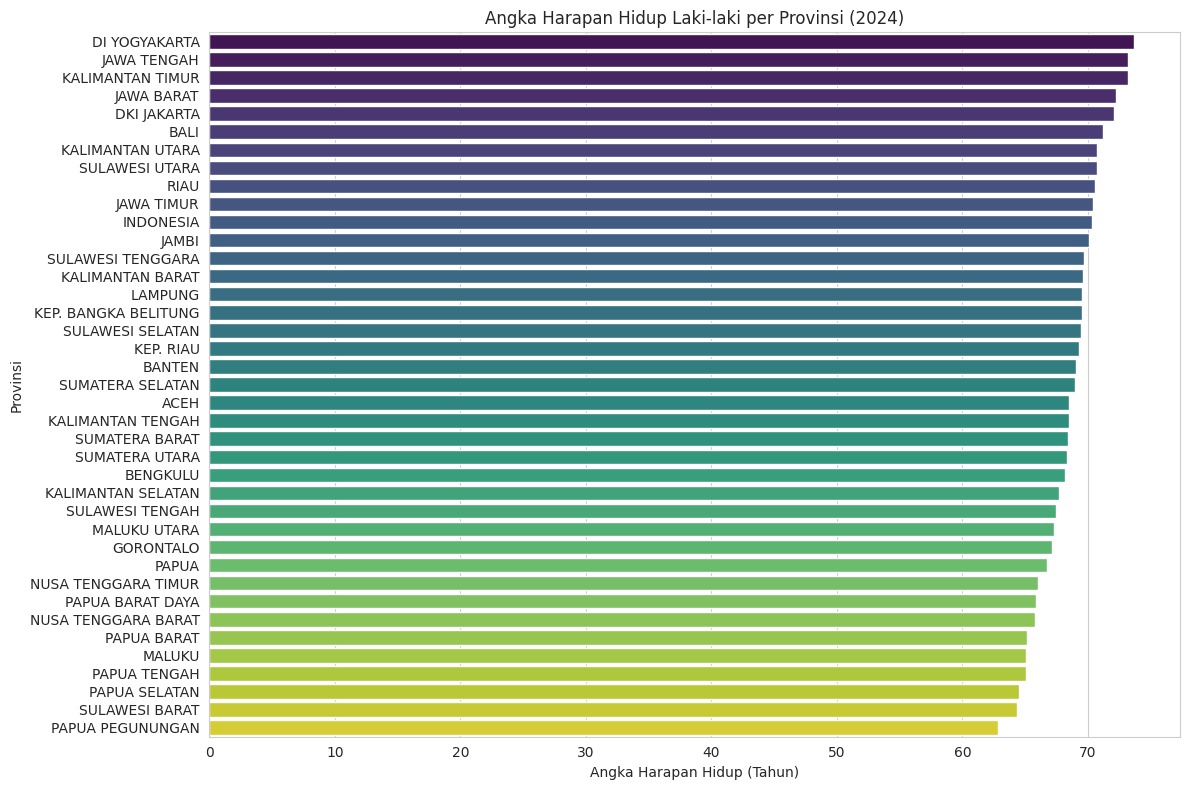

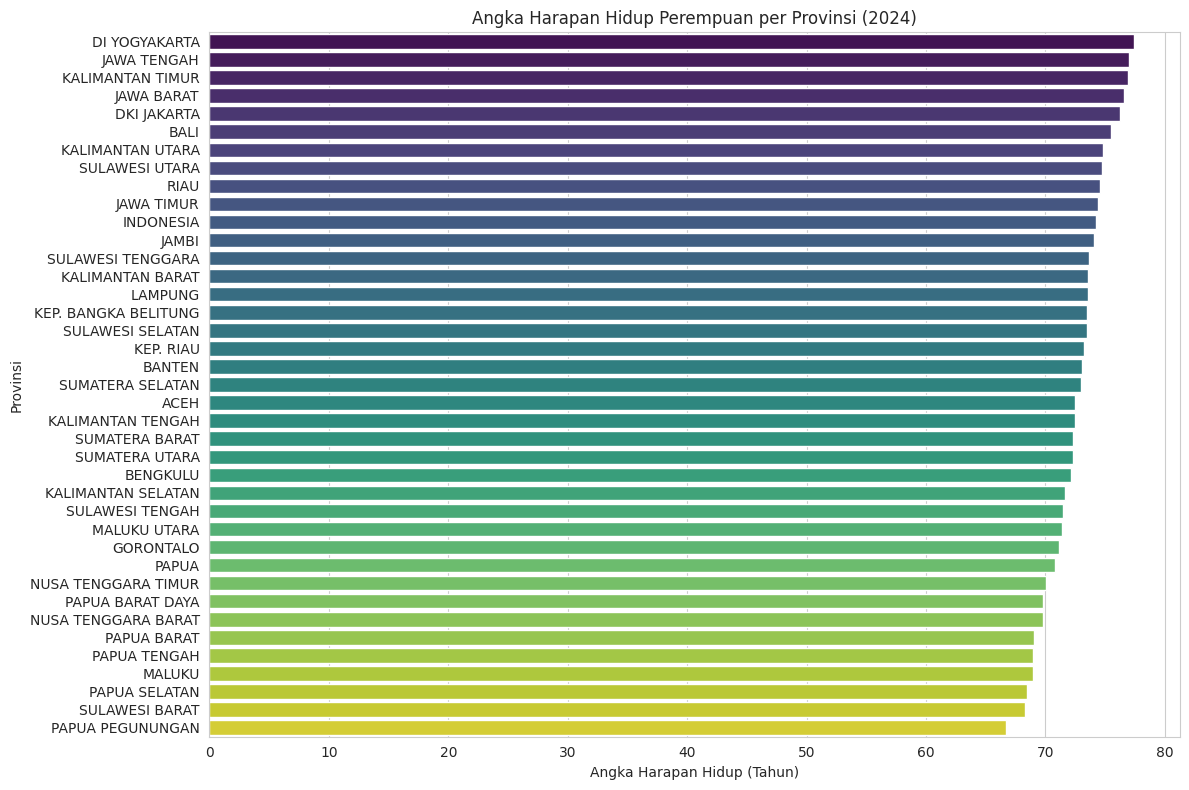

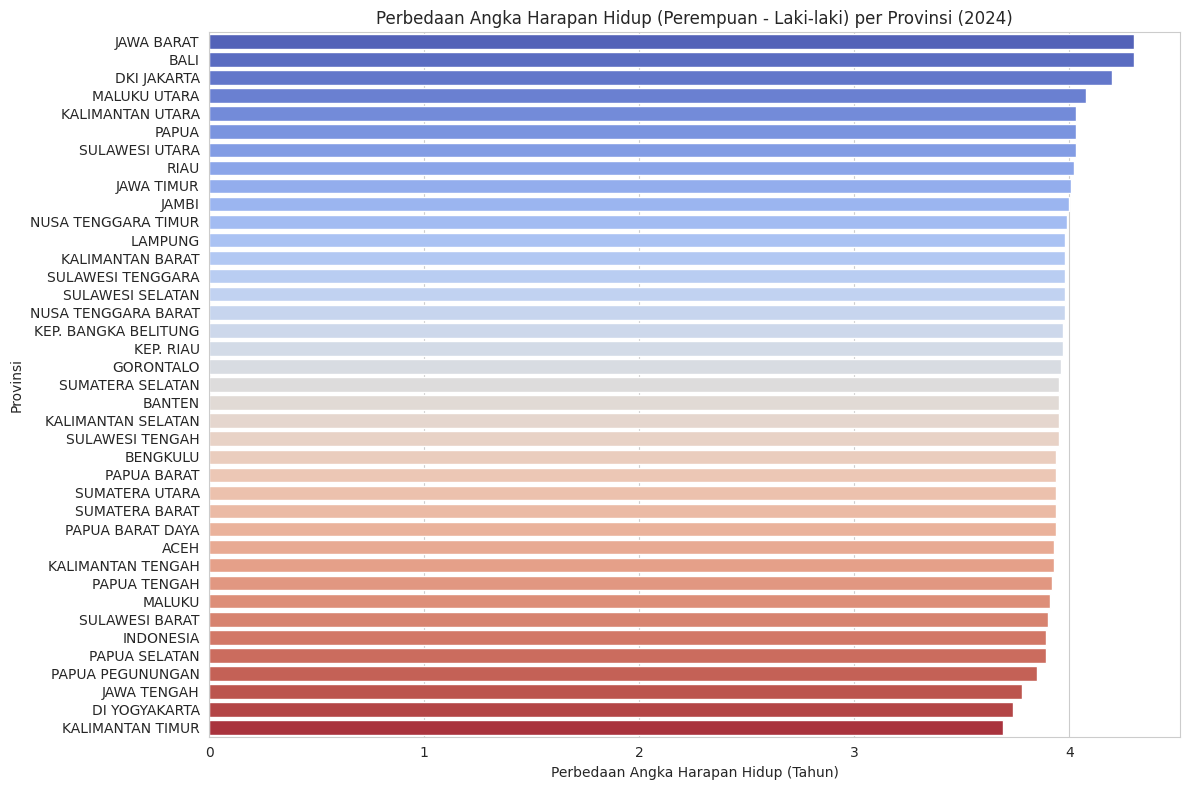

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Urutkan data berdasarkan AHH Laki-laki untuk visualisasi
df_sorted_laki = df_cleaned.sort_values('AHH Laki-laki', ascending=False)

# Visualisasi AHH Laki-laki per Provinsi
plt.figure(figsize=(12, 8))
sns.barplot(x='AHH Laki-laki', y='Provinsi', data=df_sorted_laki, palette='viridis', hue='Provinsi', legend=False)
plt.title('Angka Harapan Hidup Laki-laki per Provinsi (2024)')
plt.xlabel('Angka Harapan Hidup (Tahun)')
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()

# Urutkan data berdasarkan AHH Perempuan untuk visualisasi
df_sorted_perempuan = df_cleaned.sort_values('AHH Perempuan', ascending=False)

# Visualisasi AHH Perempuan per Provinsi
plt.figure(figsize=(12, 8))
sns.barplot(x='AHH Perempuan', y='Provinsi', data=df_sorted_perempuan, palette='viridis', hue='Provinsi', legend=False)
plt.title('Angka Harapan Hidup Perempuan per Provinsi (2024)')
plt.xlabel('Angka Harapan Hidup (Tahun)')
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()

# Urutkan data berdasarkan Perbedaan AHH untuk visualisasi
df_sorted_diff = df_cleaned.sort_values('AHH Perbedaan', ascending=False)

# Visualisasi Perbedaan AHH (Perempuan - Laki-laki) per Provinsi
plt.figure(figsize=(12, 8))
sns.barplot(x='AHH Perbedaan', y='Provinsi', data=df_sorted_diff, palette='coolwarm', hue='Provinsi', legend=False)
plt.title('Perbedaan Angka Harapan Hidup (Perempuan - Laki-laki) per Provinsi (2024)')
plt.xlabel('Perbedaan Angka Harapan Hidup (Tahun)')
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()

## 6. Penyebaran (Deployment)

Pada tahap Penyebaran, kita menyajikan hasil analisis dan wawasan yang diperoleh kepada pihak yang berkepentingan. Berdasarkan analisis Angka Harapan Hidup (AHH) per Provinsi dan Jenis Kelamin tahun 2024, berikut adalah ringkasan temuan utama:

*   **Provinsi dengan AHH Tertinggi:**
    *   Laki-laki: DI YOGYAKARTA (73.66 tahun)
    *   Perempuan: DI YOGYAKARTA (77.40 tahun)
    DI Yogyakarta menunjukkan Angka Harapan Hidup tertinggi baik untuk laki-laki maupun perempuan.

*   **Provinsi dengan AHH Terendah:**
    *   Laki-laki: PAPUA PEGUNUNGAN (62.83 tahun)
    *   Perempuan: PAPUA PEGUNUNGAN (66.68 tahun)
    Papua Pegunungan menunjukkan Angka Harapan Hidup terendah untuk kedua jenis kelamin.

*   **Perbedaan AHH antara Perempuan dan Laki-laki:**
    *   Secara umum, Angka Harapan Hidup perempuan lebih tinggi dibandingkan laki-laki di semua provinsi.
    *   Provinsi dengan perbedaan AHH terbesar antara perempuan dan laki-laki adalah JAWA BARAT dan BALI (4.30 tahun).

Visualisasi yang telah kita buat pada tahap Evaluasi memberikan gambaran yang jelas mengenai sebaran AHH di seluruh provinsi dan perbedaan antara jenis kelamin. Temuan ini dapat menjadi dasar untuk:

*   Mengidentifikasi area geografis yang memerlukan perhatian lebih dalam upaya peningkatan kesehatan masyarakat.
*   Merumuskan kebijakan kesehatan yang lebih tepat sasaran dengan mempertimbangkan perbedaan AHH berdasarkan jenis kelamin dan wilayah.
*   Melakukan studi lebih lanjut untuk menggali faktor-faktor spesifik yang berkontribusi pada perbedaan AHH antar provinsi dan jenis kelamin.

Dengan demikian, proyek data mining ini telah memberikan wawasan berharga mengenai Angka Harapan Hidup di Indonesia pada tahun 2024, yang dapat digunakan untuk mendukung pengambilan keputusan di sektor terkait.